## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2021

**Дедлайн**:   21:00 28 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [1]:
import numpy as np
from typing import Sequence


def task_1(arr: Sequence[float]) -> bool:
    return all(np.array(arr) > 0)

In [2]:
assert task_1([])
assert task_1([1, 2, 3])
assert not task_1([0, 0, 0])
assert not task_1([0])
assert not task_1([1, 2, 3, 4, 5, -1])
assert not task_1([1, 2, 3, 0, 4, 5])
assert not task_1([-1, 2, 3, 4, 5, 1])
assert not task_1([-1, -2, -3, -100])
assert task_1([0.000001])

print('Ok')

Ok


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [3]:
import numpy as np


def task_2(arr: Sequence, n: int) -> Sequence:
    return np.repeat(np.array(arr, dtype='object'), n)

In [4]:
def assert_sequences_are_equal(expected: Sequence, actual: Sequence):
    assert len(expected) == len(actual)
    for e, a in zip(expected, actual):
        assert e == a


assert_sequences_are_equal([], task_2([], 3))
assert_sequences_are_equal([], task_2([], 0))
assert_sequences_are_equal([], task_2([1, 2], 0))
assert_sequences_are_equal([1, 2], task_2([1, 2], 1))
assert_sequences_are_equal([1, 1, 1, 1, 1, -100, -100, -100, -100, -100, 777, 777, 777, 777, 777],
                           task_2([1, -100, 777], 5))
assert_sequences_are_equal(['asd', 'asd', 4, 4], task_2(['asd', 4], 2))
assert_sequences_are_equal([3, 3], task_2([3], 2))

print('Ok')

Ok


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [78]:
import numpy as np
from typing import List


def task_3(V: List[float], v: Sequence[int]):
    V, v = np.array([0] + V), np.array(v, dtype=int)

    V_cumsums = np.cumsum(V)
    selected_cumsums = V_cumsums[np.cumsum(v)]
    rolled = np.roll(selected_cumsums, 1)
    if len(rolled) > 0:
        rolled[0] = 0
    return selected_cumsums - rolled

In [79]:
assert_sequences_are_equal([3, 3, 15], task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3]))
assert_sequences_are_equal([], task_3([], []))
assert_sequences_are_equal([], task_3([1, 2, 3], []))
assert_sequences_are_equal([6, 0, 15], task_3([1, 2, 3, 4, 5, 6], [3, 0, 3]))
assert_sequences_are_equal([0, 0, 0, 46], task_3([10, 15, 21], [0, 0, 0, 3]))
assert_sequences_are_equal([33], task_3([1, 3, 7, 22], [4]))

print('Ok')

Ok


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_id', 'label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [3]:
joined = data.join(label_names.set_index('label_id'), 'label_id')
joined.head(10)

,text,is_train,label_id,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,16,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,13,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,3,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,2,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,4,comp.sys.mac.hardware


In [3]:
print(f'Total: {len(data)}')
print(f'Train: {len(data[data.is_train])}')
print(f'Test: {len(data[~data.is_train])}')

Total: 18846
Train: 11314
Test: 7532


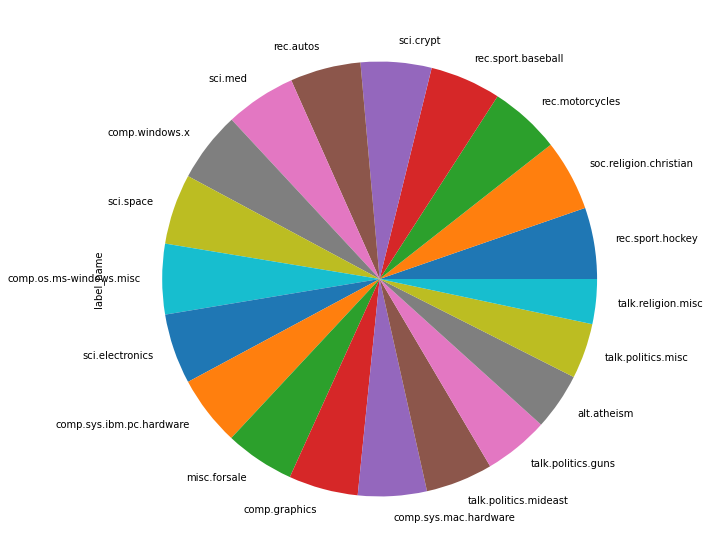

In [4]:
joined['label_name'].value_counts().plot(kind='pie', figsize=(10, 10));

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [4]:
import re

regex = re.compile(r'[^a-z]')


def preprocess(text: str):
    text = text.lower()
    text = regex.sub(' ', text)
    return list(filter(
        lambda x: len(x) > 0,
        text.split(' ')
    ))


def task_5():
    data['pp_text'] = data.apply(
        lambda x: preprocess(x['text']),
        axis=1
    )

In [5]:
task_5()

In [6]:
data.head(10)

,text,is_train,label_id,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14,"[from, jcm, head, cfa, harvard, edu, jonathan,..."
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,16,"[from, dfo, vttoulu, tko, vtt, fi, foxvog, dou..."
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,13,"[from, bmdelane, quads, uchicago, edu, brian, ..."
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,3,"[from, bgrubb, dante, nmsu, edu, grubb, subjec..."
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,2,"[from, holmes, iscsvax, uni, edu, subject, win..."
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,4,"[from, kerr, ux, cso, uiuc, edu, stan, kerr, s..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

### Создание словаря

In [7]:
from collections import Counter


def create_vocabulary() -> pd.DataFrame:
    vocabulary = Counter()

    for x in data['pp_text']:
        vocabulary.update(x)

    vocabulary = pd.DataFrame(vocabulary.items())
    vocabulary = vocabulary.rename(columns={0: 'word', 1: 'count'})

    return vocabulary

In [8]:
vocabulary = create_vocabulary()

In [9]:
vocabulary.sort_values('count', ascending=False).head(10)

,word,count
37,the,241049
45,to,124287
20,of,114160
41,a,110436
135,and,95849
25,i,90321
55,in,81616
12,is,70419
204,that,65146
7311,ax,62551


#### Количество уникальных слов

In [10]:
vocabulary.shape[0]

115065

### Гистограммы

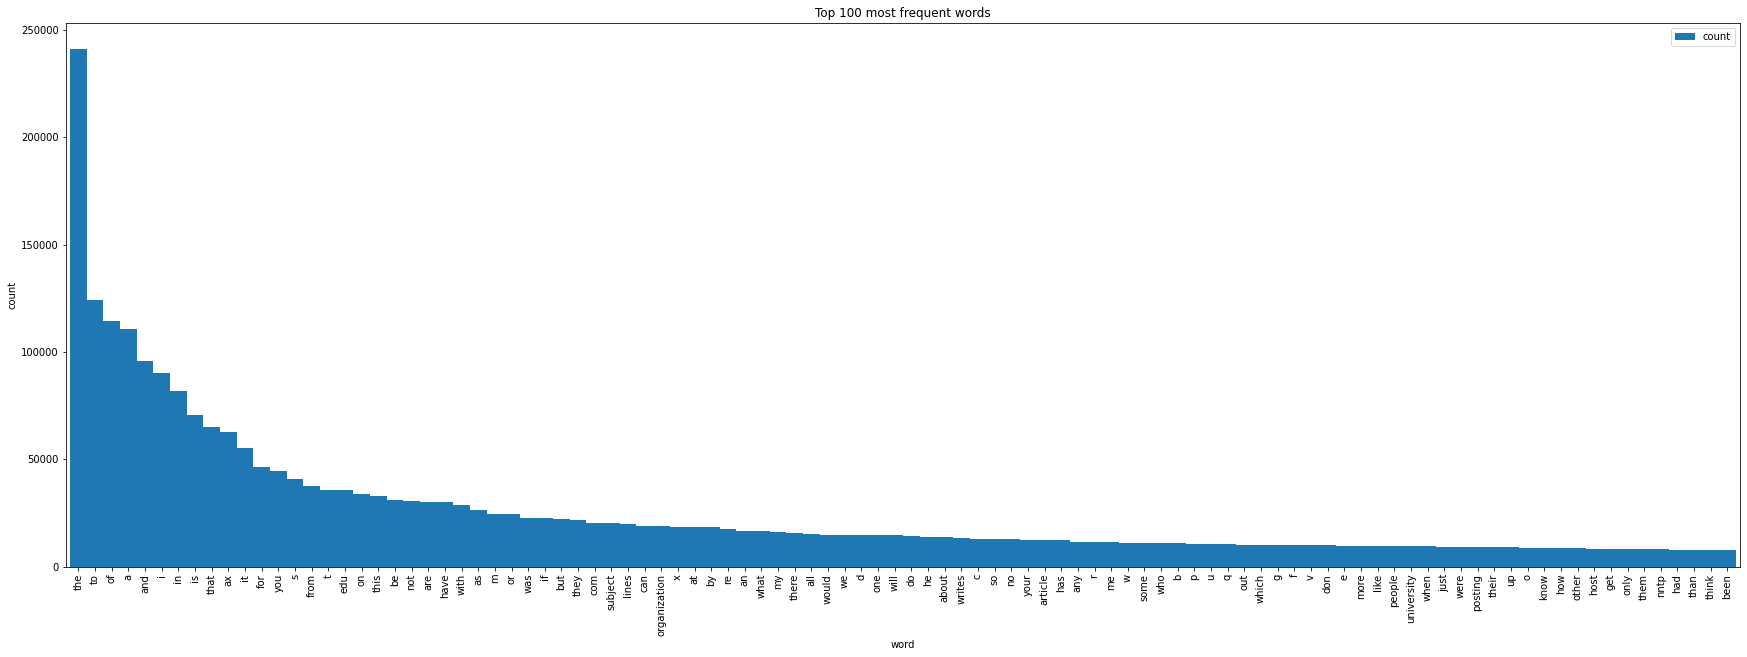

In [12]:
vocabulary.set_index('word')\
    .sort_values('count', ascending=False)\
    .head(100)\
    .plot.bar(figsize=(30, 10), width=1, ylabel='count', title='Top 100 most frequent words');

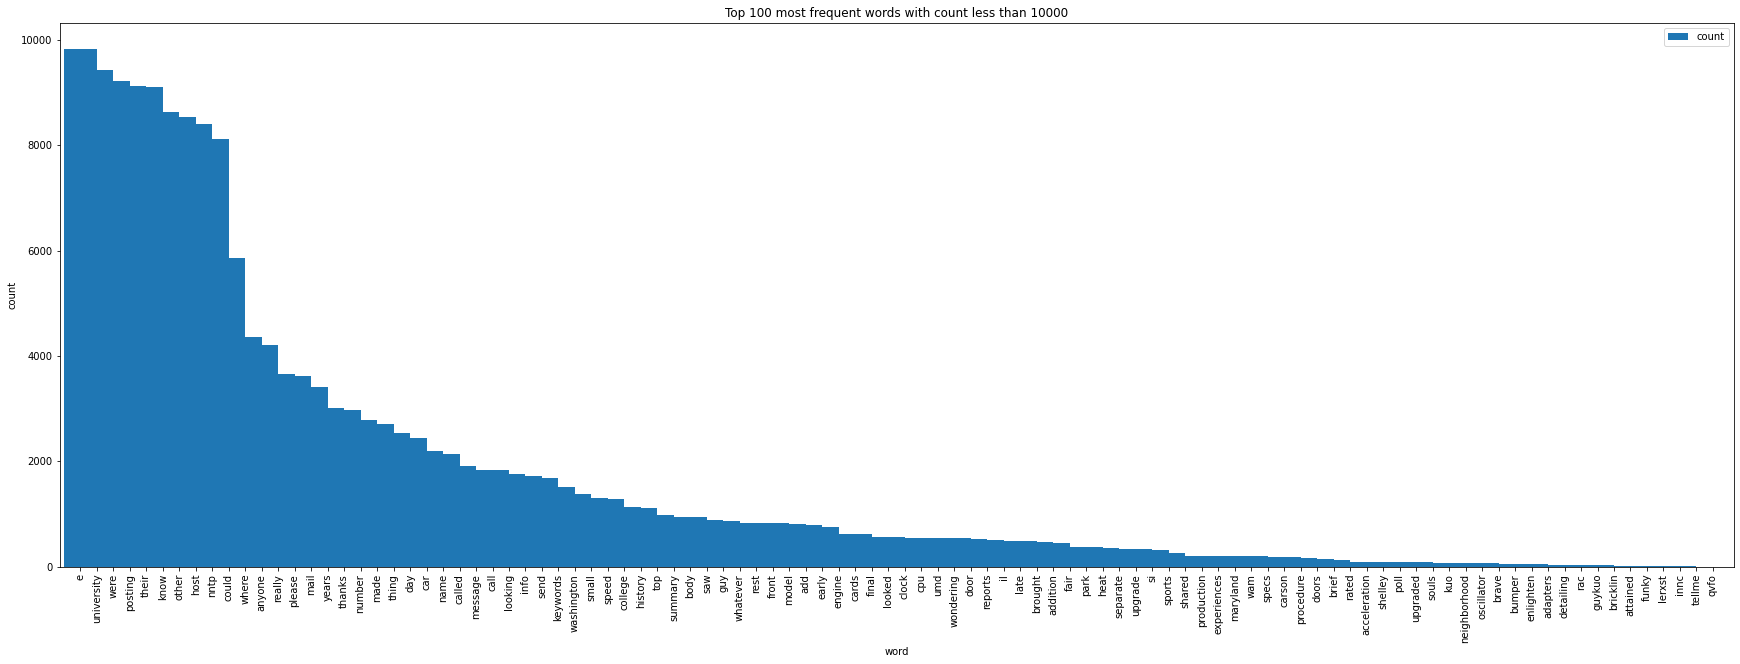

In [318]:
vocabulary[vocabulary['count'] < 10000]\
    .set_index('word')\
    .head(100)\
    .sort_values('count', ascending=False)\
    .plot(kind='bar', figsize=(30, 10), width=2, ylabel='count', title='Top 100 most frequent words with count less than 10000');

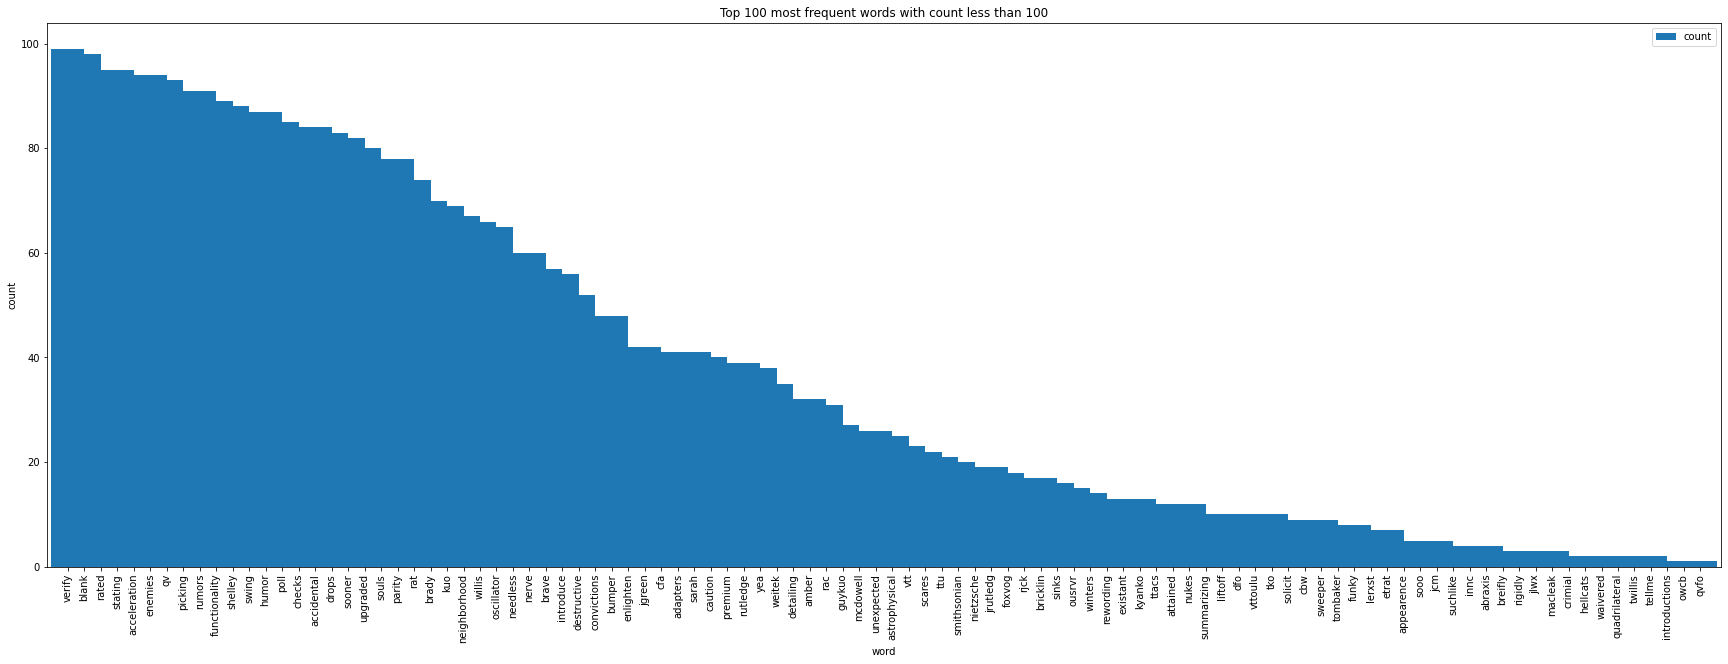

In [319]:
vocabulary[vocabulary['count'] < 100]\
    .set_index('word')\
    .head(100)\
    .sort_values('count', ascending=False)\
    .plot(kind='bar', figsize=(30, 10), width=2, ylabel='count', title='Top 100 most frequent words with count less than 100');

### Фильтрация слов

In [11]:
def is_single_char(value: str):
    return len(set(value)) == 1

vocabulary['word_len'] = vocabulary.apply(lambda x: len(x['word']), axis=1)
vocabulary['is_single_char'] = vocabulary.apply(lambda x: is_single_char(x['word']), axis=1)

In [12]:
vocabulary.sort_values('count', ascending=False).head(10)

,word,count,word_len,is_single_char
37,the,241049,3,False
45,to,124287,2,False
20,of,114160,2,False
41,a,110436,1,True
135,and,95849,3,False
25,i,90321,1,True
55,in,81616,2,False
12,is,70419,2,False
204,that,65146,4,False
7311,ax,62551,2,False


In [13]:
mask = (vocabulary['word_len'] >= 3)\
       & (vocabulary['word_len'] <= 20)\
       & (vocabulary['count'] <= 9000)\
       & (vocabulary['count'] >= 3)\
       & ~vocabulary['is_single_char']
vocabulary_filtered = vocabulary[mask]
vocabulary_filtered = vocabulary_filtered.drop(['word_len', 'is_single_char'], axis=1)

#### Отфильтрованные слова

In [14]:
vocabulary_filtered.sort_values('count', ascending=False)[['word', 'count']].head(10)

,word,count
63,know,8631
252,how,8577
38,other,8540
16,host,8394
272,get,8343
279,only,8216
572,them,8156
14,nntp,8114
229,had,7991
197,than,7839


#### Удаленные слова

In [15]:
removed_words = vocabulary[~mask][['word', 'count']]
removed_words.sort_values('count', ascending=False).head(10)

,word,count
37,the,241049
45,to,124287
20,of,114160
41,a,110436
135,and,95849
25,i,90321
55,in,81616
12,is,70419
204,that,65146
7311,ax,62551


In [16]:
print(f'Removed word count: {removed_words.shape[0]}')
print(f'Remains word count: {vocabulary_filtered.shape[0]}')

Removed word count: 63514
Remains word count: 51551


#### Результат фильтрации на гистограмме

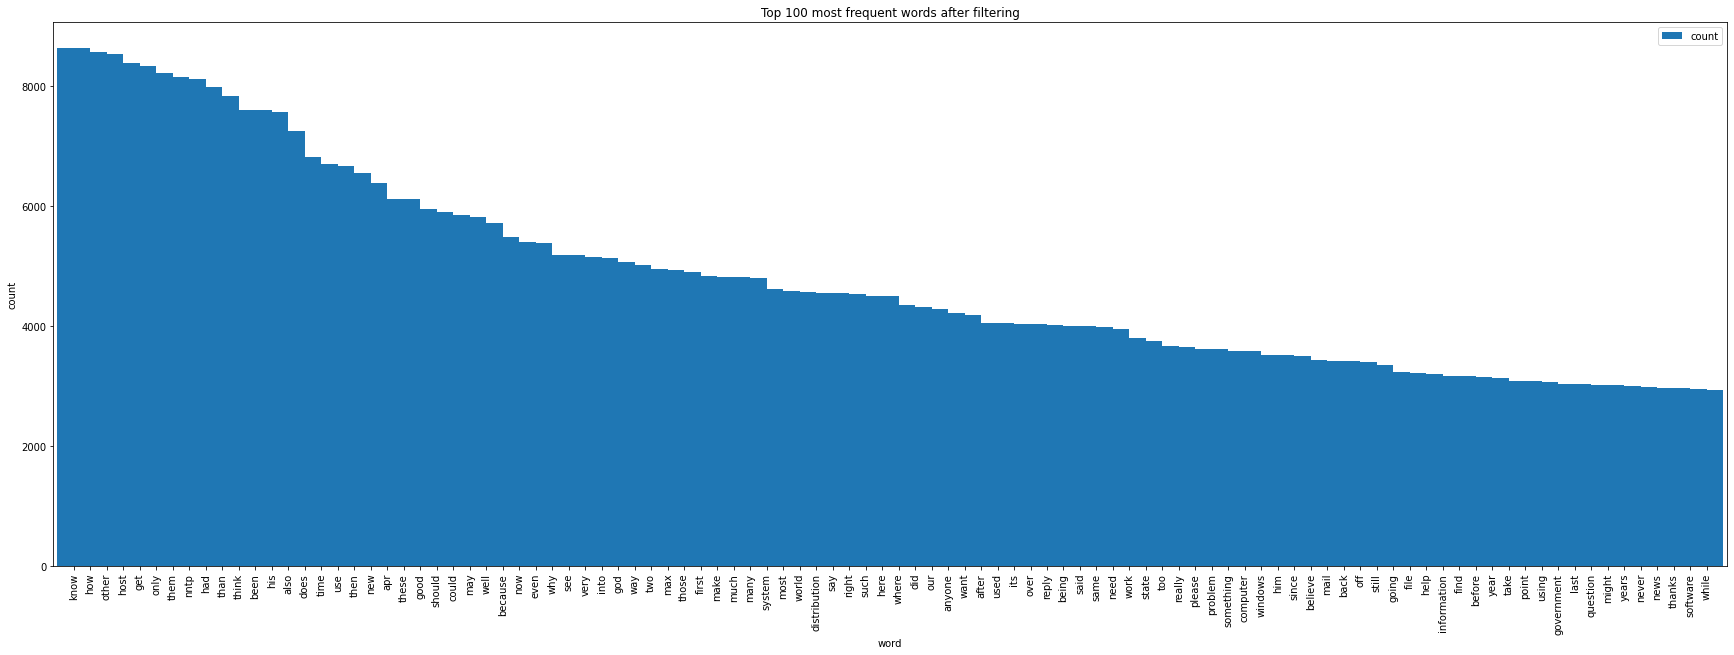

In [326]:
vocabulary_filtered[['word', 'count']].set_index('word')\
    .sort_values('count', ascending=False)\
    .head(100)\
    .plot.bar(figsize=(30, 10), width=2, ylabel='count', title='Top 100 most frequent words after filtering');

__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
vectorizer.fit(vocabulary_filtered['word']);

In [18]:
assert len(vectorizer.vocabulary_) == vocabulary_filtered.shape[0]
print('Ok')

Ok


In [19]:
vectorized_text = vectorizer.transform(data['text']).toarray()

In [20]:
vectorized_text.shape

(18846, 51551)

In [54]:
train_mask = data['is_train']
test_mask = ~train_mask
train_vectorized = vectorized_text[train_mask]
test_vectorized = vectorized_text[test_mask]

train_vectorized.shape, test_vectorized.shape

((11314, 51551), (7532, 51551))

In [22]:
train_vectorized[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [64]:
start = datetime.now()
logistic_regression = LogisticRegression(random_state=0, max_iter=200)
logistic_regression.fit(vectorized_text[train_mask], data[train_mask]['label_id'])
end = datetime.now()
print(end - start)

0:03:07.813898


In [65]:
y_pred = logistic_regression.predict(vectorized_text[test_mask])
y_true = data[test_mask]['label_id']

In [66]:
pd.DataFrame({
    'name': ['accuracy', 'f1_micro', 'f1_macro'],
    'score': [
        accuracy_score(y_true, y_pred),
        f1_score(y_true, y_pred, average='micro'),
        f1_score(y_true, y_pred, average='macro')
    ]
})

,name,score
0,accuracy,0.794477
1,f1_micro,0.794477
2,f1_macro,0.788154


In [67]:
logistic_regression = LogisticRegression(random_state=0, max_iter=200)
grid_search = GridSearchCV(logistic_regression, {'C': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]})
start = datetime.now()
grid_search.fit(vectorized_text[train_mask], data[train_mask]['label_id'])
end = datetime.now()
print(end - start)

1:26:36.467175


In [68]:
grid_search.best_score_, grid_search.best_params_

(0.8877499606361203, {'C': 0.4})

In [69]:
best_estimator: LogisticRegression = grid_search.best_estimator_
y_pred = best_estimator.predict(vectorized_text[test_mask])
pd.DataFrame({
    'name': ['accuracy', 'f1_micro', 'f1_macro'],
    'score': [
        accuracy_score(y_true, y_pred),
        f1_score(y_true, y_pred, average='micro'),
        f1_score(y_true, y_pred, average='macro')
    ]
})

,name,score
0,accuracy,0.797531
1,f1_micro,0.797531
2,f1_macro,0.791543


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def task_9():
    pass

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [ ]:
from xgboost import XGBClassifier

def task_10():
    pass

__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
def task_11():
    pass

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community


def task_12():
    # community.greedy_modularity_communities(...)
    pass